In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


import tensorflow as tf


# Load Data

In [64]:
train = pd.read_csv('./datasets/MNIST/train.csv')
test = pd.read_csv('./datasets/MNIST/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X = train.drop(labels = ['label'], axis=1)
Y = train['label']

In [45]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

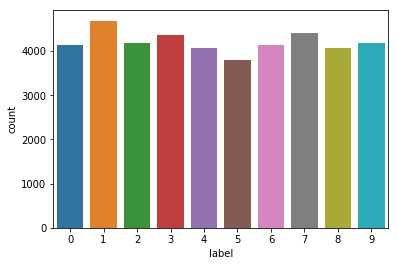

In [47]:
sns.countplot(Y)

## Check for null values

In [48]:
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [49]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

## Normalize

In [50]:
X = X/255.0
test = test/255.0

## Label Encoding

In [51]:
Y = tf.keras.utils.to_categorical(Y, num_classes=10)

## Reshape

In [52]:
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

## Train-val split

In [53]:
random_seed = 0
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=random_seed)

## CNN

In [54]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D( filters=64, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(28,28,1) ))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu ))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) ))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
flatten_6 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               409728    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [55]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=50, validation_data=[X_val, Y_val]) 

Train on 29400 samples, validate on 12600 samples
Epoch 1/50
29400/29400 [==============================] - 42s 1ms/step - loss: 0.2593 - acc: 0.9199 - val_loss: 0.0652 - val_acc: 0.9785
Epoch 2/50
29400/29400 [==============================] - 33s 1ms/step - loss: 0.0773 - acc: 0.9772 - val_loss: 0.0511 - val_acc: 0.9833
Epoch 3/50
29400/29400 [==============================] - 28s 938us/step - loss: 0.0524 - acc: 0.9834 - val_loss: 0.0454 - val_acc: 0.9857
Epoch 4/50
29400/29400 [==============================] - 32s 1ms/step - loss: 0.0411 - acc: 0.9869 - val_loss: 0.0448 - val_acc: 0.9864
Epoch 5/50
29400/29400 [==============================] - 29s 971us/step - loss: 0.0325 - acc: 0.9895 - val_loss: 0.0424 - val_acc: 0.9874
Epoch 6/50
29400/29400 [==============================] - 29s 972us/step - loss: 0.0268 - acc: 0.9910 - val_loss: 0.0421 - val_acc: 0.9884
Epoch 7/50
29400/29400 [==============================] - 28s 959us/step - loss: 0.0221 - acc: 0.9929 - val_loss: 0.0447 -

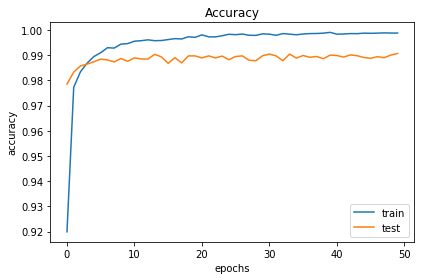

In [59]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(['train','test'])
plt.tight_layout()

In [60]:
y_pred = model.predict(test)

In [71]:
predictions = np.argmax(y_pred, axis=1)

In [62]:
sub = pd.read_csv('./datasets/MNIST/sample_submission.csv')
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [73]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"), pd.Series(predictions,name='Label')],axis = 1)

In [76]:
submission.to_csv("cnn_mnist.csv",index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
